In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import os

### Load scalability data

In [2]:
project_path = os.path.dirname(os.getcwd())
project_path

'c:\\Users\\pierp\\OneDrive\\Desktop\\Optimization Models\\Python exercises\\DSSC_MO'

In [3]:
backup = project_path + '\\backup\\pwfa_scalability.pkl'
print(backup)

with open(backup, 'rb') as file:
    scalability = pickle.load(file)
scalability

c:\Users\pierp\OneDrive\Desktop\Optimization Models\Python exercises\DSSC_MO\backup\pwfa_scalability.pkl


[[5, 5, 2, 0, 0.12048840010538697, 384.6023157000309],
 [5, 5, 2, 1, 0.060724099981598556, 315.11244680010714],
 [5, 5, 2, 2, 0.09280530002433807, 285.8463850999251],
 [5, 5, 2, 3, 0.120851100073196, 300.63642929994967],
 [5, 5, 2, 4, 0.048527599894441664, 407.39266750006936],
 [5, 6, 3, 0, 0.06195499992463738, 484.1547784000868],
 [5, 6, 3, 1, 0.09253699996042997, 476.0358877000399],
 [5, 6, 3, 2, 0.06916170008480549, 389.2881535999477],
 [5, 6, 3, 3, 0.07080240000505, 637.2397845999803],
 [5, 6, 3, 4, 0.08527719997800887, 656.3372791999718],
 [5, 7, 4, 0, 0.0991488000145182, 77.00168750004377],
 [5, 7, 4, 1, 0.09019889996852726, 264.505986400065],
 [5, 7, 4, 2, 0.09213310002814978, 279.7863673999673],
 [5, 7, 4, 3, 0.08068110002204776, 523.1075145999203],
 [5, 7, 4, 4, 0.06778949999716133, 347.76357110007666],
 [5, 8, 5, 0, 0.09165539999958128, 218.36939220002387],
 [5, 8, 5, 1, 0.10130590002518147, 887.2015842000255],
 [5, 8, 5, 2, 0.10679549991618842, 738.3491543999407],
 [5, 5, 2,

In [5]:
columns = ['fields', 'storages', 'vehicles', 'iter', 'build_time', 'opt_time']
df_scalability = pd.DataFrame(scalability, columns=columns)
df_scalability = df_scalability.sort_values(by=['fields', 'storages', 'iter'], ascending=[True, True, True])  
df_scalability

,fields,storages,vehicles,iter,build_time,opt_time
0,5,5,2,0,0.120488,384.602316
1,5,5,2,1,0.060724,315.112447
2,5,5,2,2,0.092805,285.846385
3,5,5,2,3,0.120851,300.636429
4,5,5,2,4,0.048528,407.392668
18,5,5,2,5,0.052672,307.496181
19,5,5,2,6,0.113238,284.128043
20,5,5,2,7,0.059858,215.633567
21,5,5,2,8,0.073733,254.344419
22,5,5,2,9,0.056281,279.192075


Some iterations seem blocked or return an optimization runtime which is way far from the other iterations for the same set of [n. fields, n. storages, n. vehichels]; these runs are outiliers and they will not considered for the scalabiltiy analisys.

In [ ]:
# df_scalability = df_scalability.drop([30, 31, 37]) # remove outliers

###  Group iterations 

group by: 'fields', 'storages' and 'vehicles' and compute mean and standard deviation

In [7]:
df = df_scalability.groupby(['fields', 'storages', 'vehicles'], group_keys=True).agg({'build_time':['mean','std'], 'opt_time':['mean', 'std']})
print(df)

                         build_time              opt_time            
                               mean       std        mean         std
fields storages vehicles                                             
5      5        2          0.079918  0.029237  303.438453   56.710602
       6        3          0.076802  0.010650  574.107199  168.717949
       7        4          0.088931  0.015474  353.802143  226.758897
       8        5          0.099919  0.007665  614.640044  351.158203


### Produce Visualization

In [8]:
path = project_path + '\\images\\'
foot = 'parallel_5_fields_'

In [9]:
path

'c:\\Users\\pierp\\OneDrive\\Desktop\\Optimization Models\\Python exercises\\DSSC_MO\\images\\'

##### Plot Buid runtime

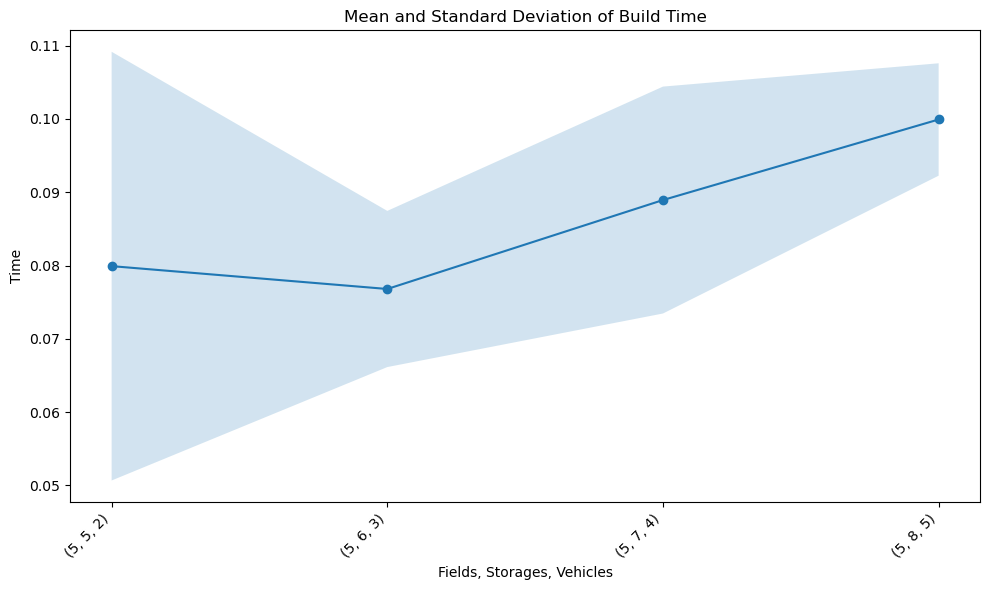

In [10]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot build_time
df['build_time']['mean'].plot(ax=ax, marker='o', label='build_time mean')
ax.fill_between(
    range(len(df)),
    df['build_time']['mean'] - df['build_time']['std'],
    df['build_time']['mean'] + df['build_time']['std'],
    alpha=0.2
)

# Customize the plot
ax.set_xticks(range(len(df)))
ax.set_xticklabels(df.index.tolist(), rotation=45, ha='right')
ax.set_xlabel('Fields, Storages, Vehicles')
ax.set_ylabel('Time')
ax.set_title('Mean and Standard Deviation of Build Time')

plt.savefig(path + f'{foot}build_time.svg', format='svg')
plt.tight_layout()
plt.show()

##### Plot Optimiaziotion runtime

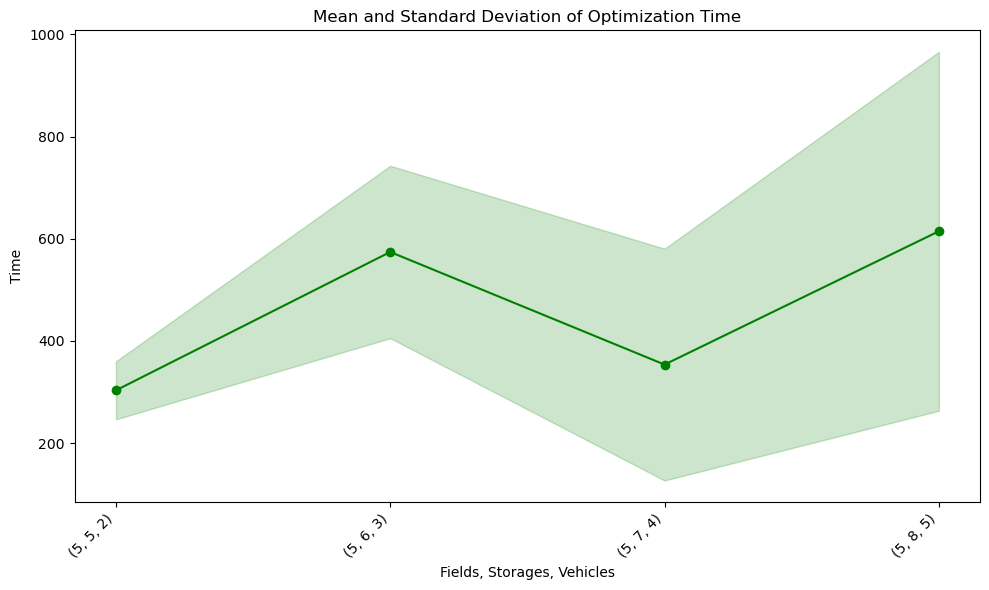

In [11]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot opt_time
df['opt_time']['mean'].plot(ax=ax, marker='o', color='green')
ax.fill_between(
    range(len(df)),
    df['opt_time']['mean'] - df['opt_time']['std'],
    df['opt_time']['mean'] + df['opt_time']['std'],
    alpha=0.2,
    color='green'
)

# Customize the plot
ax.set_xticks(range(len(df)))
ax.set_xticklabels(df.index.tolist(), rotation=45, ha='right')
ax.set_xlabel('Fields, Storages, Vehicles')
ax.set_ylabel('Time')
ax.set_title('Mean and Standard Deviation of Optimization Time')

plt.savefig(path + f'{foot}opt_time.svg', format='svg')
plt.tight_layout()
plt.show()

##### Plot Total runtime (Build + Optimization)

In [12]:
# Group by the first level of the multi-index and sum
tot_time = {
 'mean_time': df.loc[:,'build_time']['mean'] + df.loc[:,'opt_time']['mean'],
 'std_time': df.loc[:,'build_time']['std'] + df.loc[:,'opt_time']['std']
}

tot_time = pd.DataFrame(tot_time)
print(tot_time) 

                           mean_time    std_time
fields storages vehicles                        
5      5        2         303.518371   56.739839
       6        3         574.184001  168.728599
       7        4         353.891075  226.774372
       8        5         614.739963  351.165867


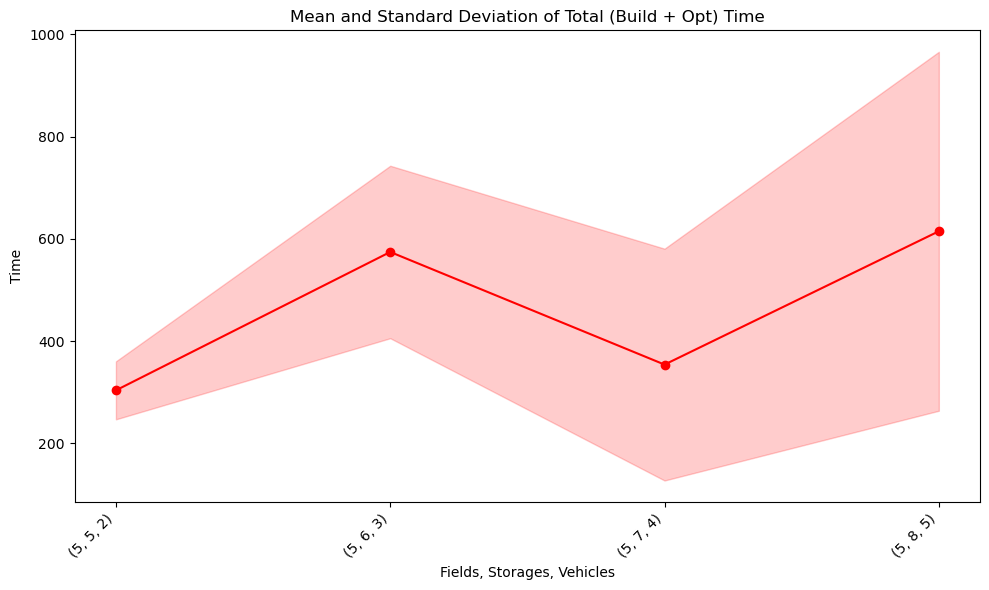

In [13]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot tot_time
tot_time['mean_time'].plot(ax=ax, marker='o', color='red')
ax.fill_between(
    range(len(tot_time)),
    tot_time['mean_time'] - tot_time['std_time'],
    tot_time['mean_time'] + tot_time['std_time'],
    alpha=0.2,
    color='red'
)

# Customize the plot
ax.set_xticks(range(len(tot_time)))
ax.set_xticklabels(tot_time.index.tolist(), rotation=45, ha='right')
ax.set_xlabel('Fields, Storages, Vehicles')
ax.set_ylabel('Time')
ax.set_title('Mean and Standard Deviation of Total (Build + Opt) Time')

plt.tight_layout()
plt.savefig(path + f'{foot}total_time.svg', format='svg')
plt.show()

##### Plot Total runtime (Build + Optimization) & only Optimization runtime

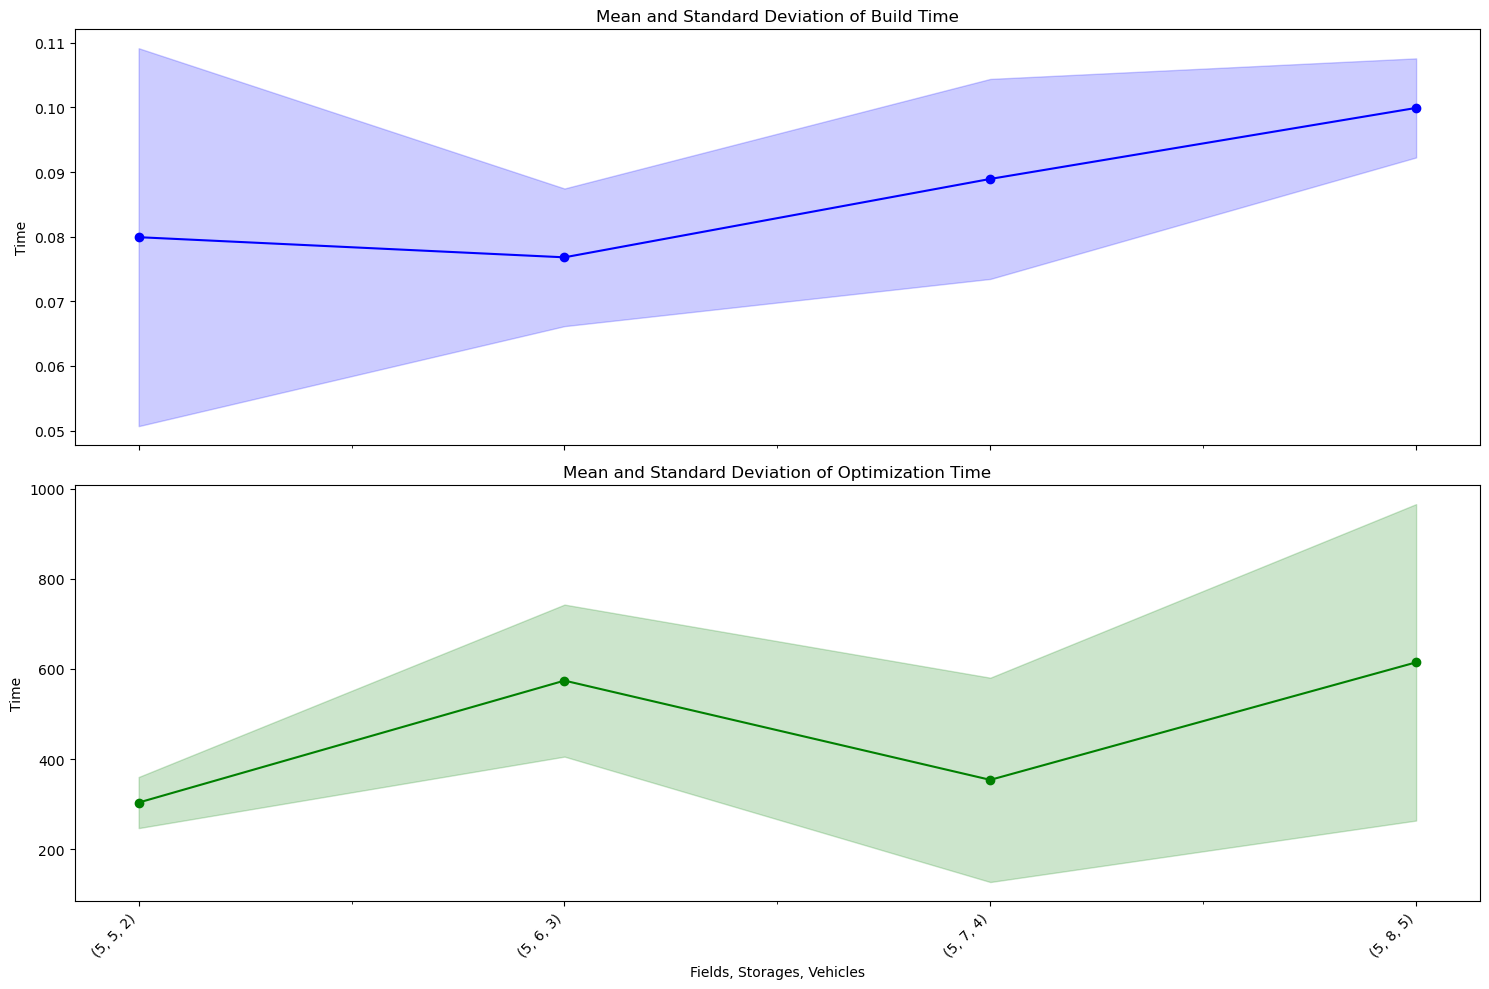

In [14]:
# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Plot build_time
df['build_time']['mean'].plot(ax=ax1, marker='o', label='build mean time', color='blue')
ax1.fill_between(
    range(len(tot_time)),
    df['build_time']['mean'] - df['build_time']['std'],
    df['build_time']['mean'] + df['build_time']['std'],
    alpha=0.2,
    color='blue'
)

ax1.set_xticks(range(len(df['build_time'])))
ax1.set_xticklabels(df['build_time'].index.tolist(), rotation=45, ha='right')

ax1.set_title('Mean and Standard Deviation of Build Time')
ax1.set_ylabel('Time')
ax1.set_xlabel('Fields, Storages, Vehicles')

# Plot opt_time
df['opt_time']['mean'].plot(ax=ax2, marker='o', label='opt mean time', color='green')
ax2.fill_between(
    range(len(df)),
    df['opt_time']['mean'] - df['opt_time']['std'],
    df['opt_time']['mean'] + df['opt_time']['std'],
    alpha=0.2,
    color='green'
)

ax2.set_xticks(range(len(df['opt_time'])))
ax2.set_xticklabels(df['opt_time'].index.tolist(), rotation=45, ha='right')

ax2.set_title('Mean and Standard Deviation of Optimization Time')
ax2.set_ylabel('Time')
ax2.set_xlabel('Fields, Storages, Vehicles')


plt.savefig(path + f'{foot}total_and_opt_time.svg', format='svg')
plt.tight_layout()
plt.show()